# Chemical Potential Overlap Descriptor Example
*October 28, 2025*

This notebook demonstrates how to use `pytheos` to extract chemical potential diagrams from the [Materials Project](https://next-gen.materialsproject.org/) database. In this example we will be exploring the rocksalt high-entropy oxide systems investigated in our Nature Communications publication where we introduced this descriptor: [Thermodynamics-Inspired High-Entropy Oxide Synthesis](https://www.nature.com/articles/s41467-025-63567-z).

For more information on how these chemical potential diagrams are constructed, as well as the logic behind our developed chemical potential overlap descriptor for HEO discovery, please see Chapter 6 of my dissertation [(Link)](https://etda.libraries.psu.edu/catalog/21095jts6114). The following is a schematic taken from my dissertation showing how chemical potential diagrams are created from convex hulls:

<div>
<img src="./chempot_overlap_files/chempot_diagram_schematic.png" width="850"/>
</div>

## MgO

In [1]:
from pytheos.stability import materials_project, phase_diagram, chemical_potential

# good practice to ensure data can be reproduced in the future since entries can change within the database
materials_project.get_db_version()

'2025.09.25'

In [2]:
# we will start by just going over this process for rocksalt MgO
Mg_O_entries = materials_project.query_entries_across_chemsys(
    elements=["Mg", "O"], 
    api_key="YOUR_API_KEY",
    thermo_type="GGA_GGA+U",
    )
print(f"{len(Mg_O_entries)} entries found across the Mg-O chemical system for GGA/GGA+U Materials Project.")

Retrieving ThermoDoc documents:   0%|          | 0/58 [00:00<?, ?it/s]

58 entries found across the Mg-O chemical system for GGA/GGA+U Materials Project.


In [3]:
# now let's create a phase diagram using these entries
Mg_O_pd = phase_diagram.generate_phase_diagram(entries=Mg_O_entries)
print(Mg_O_pd)

Mg-O phase diagram
3 stable phases: 
Mg, MgO, O2


As expected for the Mg-O chemical system, we only have three stable phases: elemental Magnesium and Oxygen, and rocksalt MgO

In [4]:
MgO_chempot = chemical_potential.ChemPotDiagram(
    phase_diagram=Mg_O_pd,
    cation="Mg",
    anion="O", # built so this class can be used for other ceramic materials such as nitrides/carbides
    target_compound="MgO",
)
print(MgO_chempot.__dict__)

{'phase_diagram': Mg-O phase diagram
3 stable phases: 
Mg, MgO, O2, 'target_compound': 'MgO', 'cation': 'Mg', 'anion': 'O', 'all_stable_ranges': None, 'target_ranges': None, 'target_anion_range': None, 'diagram': None}


In [5]:
# first let's extract all chemical potential ranges for our chemical potential diagram we constructed
MgO_chempot.get_all_stable_ranges()

,formula,Mg (eV),O (eV)
0,O,-50.000000,0.000000
1,MgO,-6.106808,0.000000
2,O,-6.106808,0.000000
3,MgO,0.000000,-6.106808
4,Mg,0.000000,-6.106808
5,Mg,0.000000,-50.000000


In [6]:
# now we can extract just our target anion range for which our target compound specified earlier is stable
MgO_stable_oxygen_chempot_range = MgO_chempot.get_target_anion_range()

print(f"Minimum: \t{MgO_stable_oxygen_chempot_range["min"]:.3f} eV")
print(f"Maximum: \t{MgO_stable_oxygen_chempot_range["max"]:.3f} eV")
print(f"Distance: \t{MgO_stable_oxygen_chempot_range["distance"]:.3f} eV")

Minimum: 	-6.107 eV
Maximum: 	0.000 eV
Distance: 	6.107 eV


As we can see, this matches the output of the `get_all_stable_ranges()` for our target compound of MgO along the oxygen chemical potential axis. These modules of the `ChemPotDiagram` class within `pytheos` are extremely useful to automate this process and explore a significant amount of compositions in a high-throughput manner.

***Notice that the chemical potential diagrams are only sensitive to the stoichiometry, not the structure for a given composition...***

Now let's visualize this Mg-O chemical potential diagram:

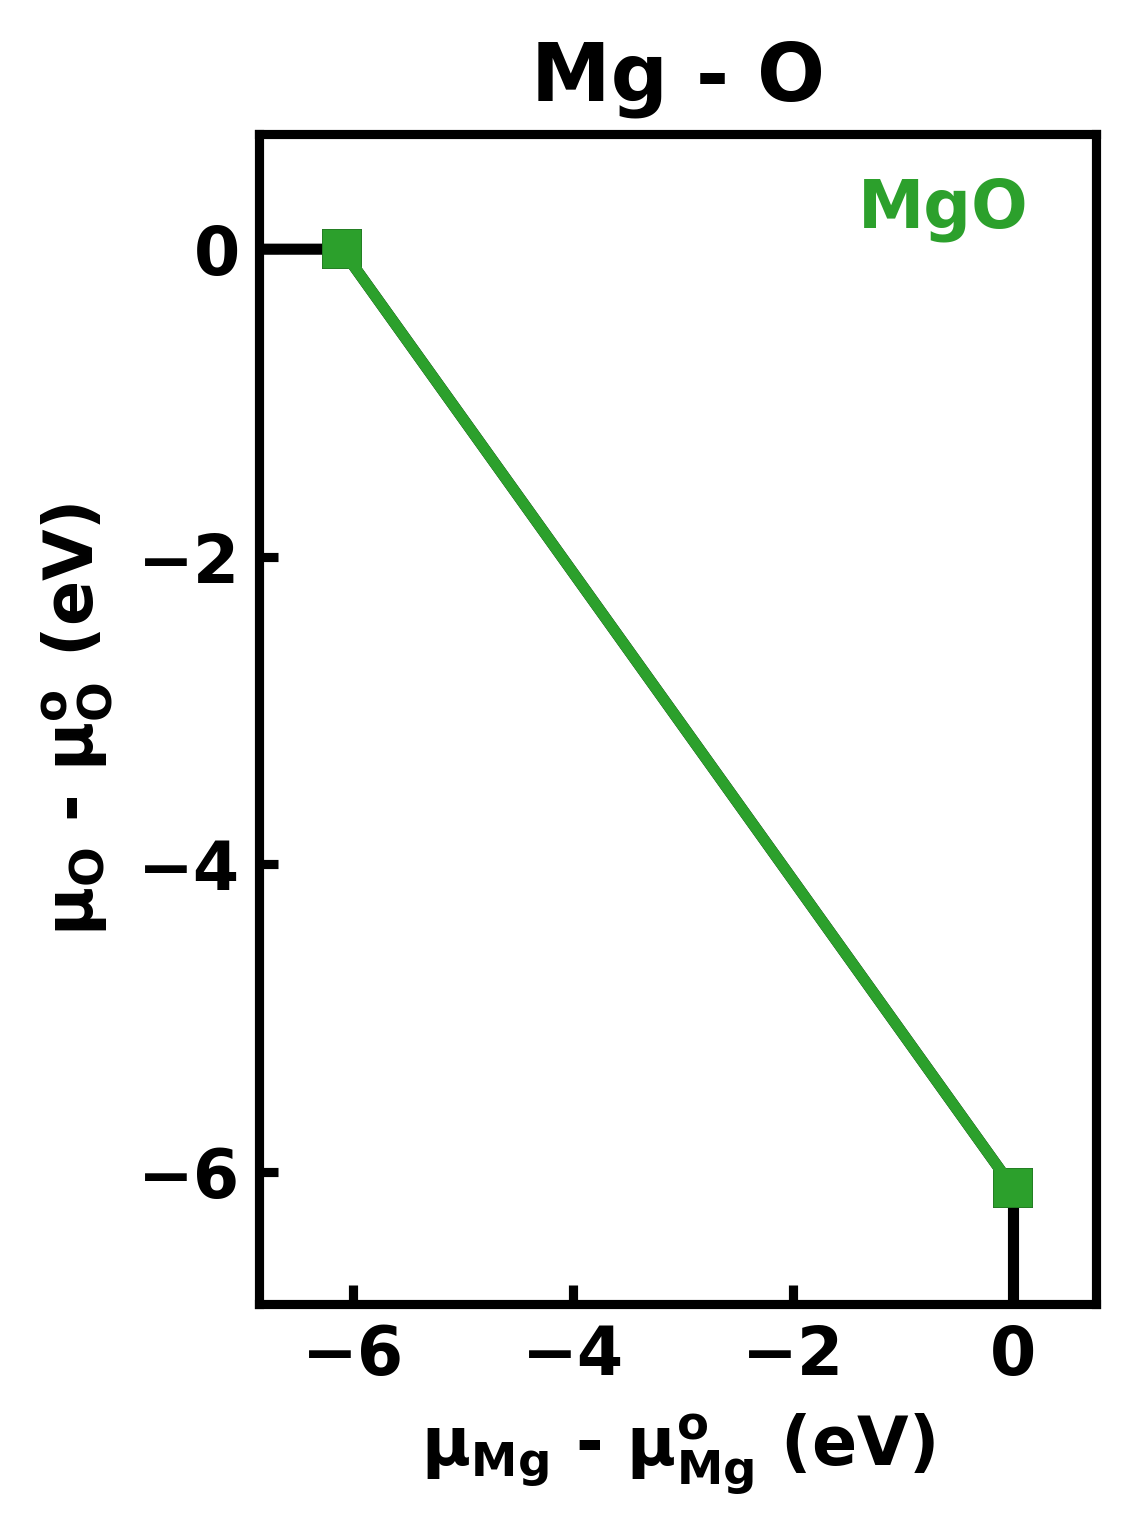

<Figure size 1200x1600 with 0 Axes>

In [7]:
MgO_chempot.plot_diagram(
    with_target=True # highlights the targeted composition in green for easier visualization
    )

## CoO
Now let's take a look at a bit more complicated chemical potential diagram for the Co-O chemical system that has multiple stable oxide compounds.

I will go less step-by-step here since I already walked through each of these with Mg-O above...

In [8]:
Co_O_entries = materials_project.query_entries_across_chemsys(
    elements=["Co", "O"], 
    api_key="YOUR_API_KEY",
    thermo_type="GGA_GGA+U",
    )
print(f"{len(Co_O_entries)} entries found across the Co-O chemical system for GGA/GGA+U Materials Project.\n")

Co_O_pd = phase_diagram.generate_phase_diagram(entries=Co_O_entries)
print(Co_O_pd)

CoO_chempot = chemical_potential.ChemPotDiagram(
    phase_diagram=Co_O_pd,
    cation="Co",
    anion="O",
    target_compound="CoO",
)

Retrieving ThermoDoc documents:   0%|          | 0/89 [00:00<?, ?it/s]

89 entries found across the Co-O chemical system for GGA/GGA+U Materials Project.

Co-O phase diagram
6 stable phases: 
Co3O4, O2, CoO2, CoO, Co, Co23O32


In [9]:
CoO_chempot.get_all_stable_ranges()

,formula,Co (eV),O (eV)
0,O,-50.000000,0.000000
1,CoO2,-3.242397,0.000000
2,O,-3.242397,0.000000
3,CoO2,-2.672728,-0.284834
4,Co23O32,-2.672728,-0.284834
5,Co3O4,-2.273869,-0.571514
6,Co23O32,-2.273869,-0.571514
7,CoO,-1.167381,-1.401381
8,Co3O4,-1.167381,-1.401381
9,CoO,0.000000,-2.568761


In [10]:
# now we can extract just our target anion range for which our target compound specified earlier is stable
CoO_stable_oxygen_chempot_range = CoO_chempot.get_target_anion_range()

print(f"Minimum: \t{CoO_stable_oxygen_chempot_range["min"]:.3f} eV")
print(f"Maximum: \t{CoO_stable_oxygen_chempot_range["max"]:.3f} eV")
print(f"Distance: \t{CoO_stable_oxygen_chempot_range["distance"]:.3f} eV")

Minimum: 	-2.569 eV
Maximum: 	-1.401 eV
Distance: 	1.167 eV


Notice that CoO has a narrower "window" compared to MgO within oxygen chemical potential space due to the addition oxide compositions that are stable along the convex hull.

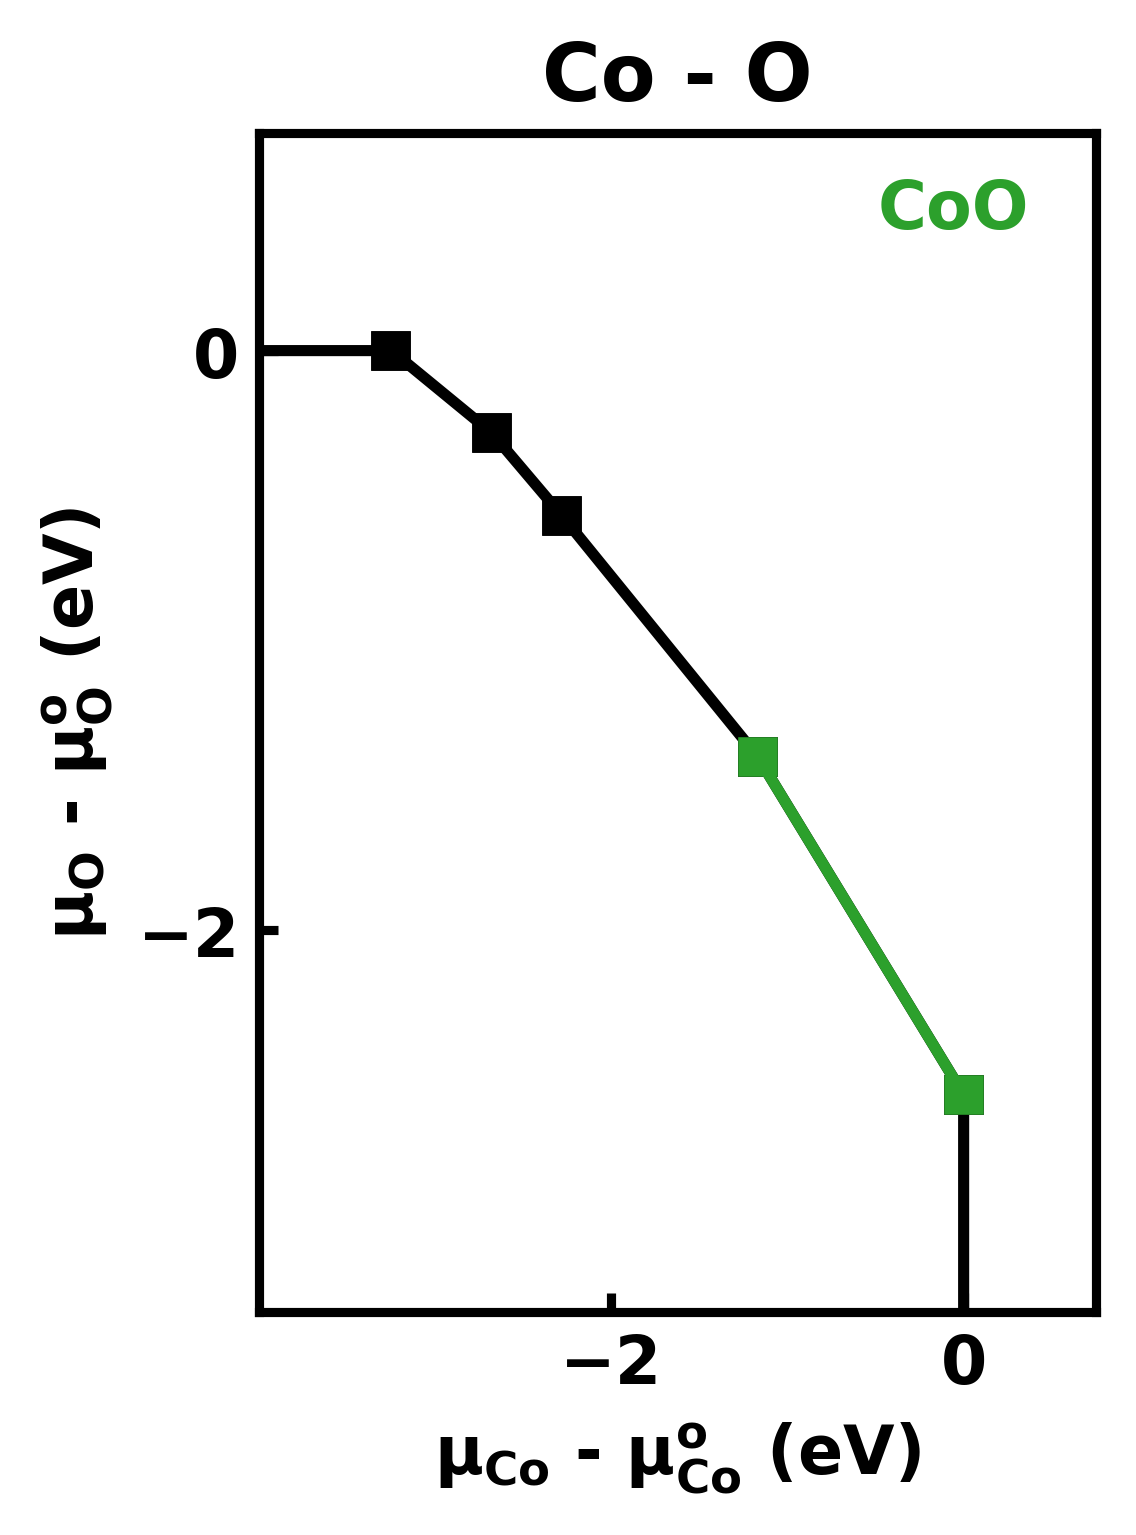

<Figure size 1200x1600 with 0 Axes>

In [11]:
CoO_chempot.plot_diagram(with_target=True)

## Computing the Chemical Potential Overlap Descriptor ($\mu_{overlap}$)

We can use the stable oxygen chemical potential ranges to compute what we have called the "chemical potential overlap descriptor", or $\mu_{overlap}$. This is inspired by Yokokawa's 1999 article on the [Generalized chemical potential diagram and its applications to chemical reactions at interfaces between dissimilar materials](https://doi.org/10.1361/105497199770335794), where the separation and overlap of stable oxygen chemical potential windows are used to explain (in)solubility of different oxide compositions.

This novel computational descriptor provides a simple and extremely computationally cheap route to evaluating the cation valence compatibility within ceramic materials, which we utilize primarily for high-entropy oxide discovery. A negative value indicates separation in the stable oxygen chemical potential space, while a positive value indicates overlap in the stable oxygen chemical potential space.

For more details on how this descriptor is computed, please see the following Nature Communication publication: [Thermodynamics-Inspired High-Entropy Oxide Synthesis](https://www.nature.com/articles/s41467-025-63567-z).

In [12]:
# let's go through all of the cations explored for rocksalt HEOs in our publication: Mg, Ca, Mn, Fe, Co, Ni, Cu, Zn
import pandas as pd

cation_cohort = ["Mg", "Ca", "Mn", "Fe", "Co", "Ni", "Cu", "Zn"]
AO_stable_ranges = {}

for cation in cation_cohort:
    
    print(f"=== {cation}-O ===")

    entries = materials_project.query_entries_across_chemsys(
    elements=[cation, "O"], 
    api_key="YOUR_API_KEY",
    thermo_type="GGA_GGA+U",
    )
    print(f"{len(entries)} entries found across the GGA/GGA+U Materials Project database.\n")

    phasediagram = phase_diagram.generate_phase_diagram(entries=entries)

    chempot = chemical_potential.ChemPotDiagram(
        phase_diagram=phasediagram,
        cation=cation,
        anion="O",
        target_compound=f"{cation}O",
    )

    chempot.get_all_stable_ranges()

    AO_stable_range = chempot.get_target_anion_range()
    
    AO_stable_ranges[f"{cation}O"] = (AO_stable_range["min"], AO_stable_range["max"])

print(pd.DataFrame(AO_stable_ranges))

=== Mg-O ===


Retrieving ThermoDoc documents:   0%|          | 0/58 [00:00<?, ?it/s]

58 entries found across the GGA/GGA+U Materials Project database.

=== Ca-O ===


Retrieving ThermoDoc documents:   0%|          | 0/49 [00:00<?, ?it/s]

49 entries found across the GGA/GGA+U Materials Project database.

=== Mn-O ===


Retrieving ThermoDoc documents:   0%|          | 0/96 [00:00<?, ?it/s]

96 entries found across the GGA/GGA+U Materials Project database.

=== Fe-O ===


Retrieving ThermoDoc documents:   0%|          | 0/169 [00:00<?, ?it/s]

169 entries found across the GGA/GGA+U Materials Project database.

=== Co-O ===


Retrieving ThermoDoc documents:   0%|          | 0/89 [00:00<?, ?it/s]

89 entries found across the GGA/GGA+U Materials Project database.

=== Ni-O ===


Retrieving ThermoDoc documents:   0%|          | 0/64 [00:00<?, ?it/s]

64 entries found across the GGA/GGA+U Materials Project database.

=== Cu-O ===


Retrieving ThermoDoc documents:   0%|          | 0/68 [00:00<?, ?it/s]

68 entries found across the GGA/GGA+U Materials Project database.

=== Zn-O ===


Retrieving ThermoDoc documents:   0%|          | 0/48 [00:00<?, ?it/s]

48 entries found across the GGA/GGA+U Materials Project database.

        MgO       CaO       MnO       FeO       CoO       NiO       CuO  \
0 -6.106808 -6.612039 -3.958402 -2.963039 -2.568761 -2.436171 -1.837663   
1  0.000000 -0.007642 -2.477657 -2.609379 -1.401381 -0.018739 -0.394465   

        ZnO  
0 -3.581798  
1  0.000000  


Which correspond to the following chemical potential diagrams...

<div>
<img src="./chempot_overlap_files/chempot_diagram_AO.png" width="1200"/>
</div>

Now that we have the stable oxygen chemical potential ranges for each of our cations, we can start to compute the 2-cation chemical potential overlap ($\mu_{overlap}$)

In [13]:
from itertools import combinations

combos_2cation = list(combinations(cation_cohort, 2))
print(f"There are {len(combos_2cation)} 2-cation combinations for our cation cohort:\n{combos_2cation}\n\n")

chempot_overlaps_2cation = {
    "combo": [],
    "overlap (eV)": [],
}

for combo in combos_2cation:

    range1 = AO_stable_ranges[f"{combo[0]}O"]
    range2 = AO_stable_ranges[f"{combo[1]}O"]

    overlap_dict = chemical_potential.calc_overlap(ranges=(range1, range2))

    chempot_overlaps_2cation["combo"].append(f"{combo[0]}{combo[1]}")
    chempot_overlaps_2cation["overlap (eV)"].append(overlap_dict["overlap"])

print(pd.DataFrame(chempot_overlaps_2cation))

There are 28 2-cation combinations for our cation cohort:
[('Mg', 'Ca'), ('Mg', 'Mn'), ('Mg', 'Fe'), ('Mg', 'Co'), ('Mg', 'Ni'), ('Mg', 'Cu'), ('Mg', 'Zn'), ('Ca', 'Mn'), ('Ca', 'Fe'), ('Ca', 'Co'), ('Ca', 'Ni'), ('Ca', 'Cu'), ('Ca', 'Zn'), ('Mn', 'Fe'), ('Mn', 'Co'), ('Mn', 'Ni'), ('Mn', 'Cu'), ('Mn', 'Zn'), ('Fe', 'Co'), ('Fe', 'Ni'), ('Fe', 'Cu'), ('Fe', 'Zn'), ('Co', 'Ni'), ('Co', 'Cu'), ('Co', 'Zn'), ('Ni', 'Cu'), ('Ni', 'Zn'), ('Cu', 'Zn')]


   combo  overlap (eV)
0   MgCa      6.099167
1   MgMn      1.480745
2   MgFe      0.353660
3   MgCo      1.167381
4   MgNi      2.417432
5   MgCu      1.443198
6   MgZn      3.581798
7   CaMn      1.480745
8   CaFe      0.353660
9   CaCo      1.167381
10  CaNi      2.417432
11  CaCu      1.443198
12  CaZn      3.574157
13  MnFe      0.353660
14  MnCo      0.091104
15  MnNi     -0.041487
16  MnCu     -0.639994
17  MnZn      1.104141
18  FeCo     -0.040618
19  FeNi     -0.173209
20  FeCu     -0.771716
21  FeZn      0.353660
22  CoNi      1.03

*Remember that a negative value indicates separation in oxygen chemical potential space, while a positive value indicates an overlap.*

We can more easily visualize these $\mu_{overlap}$ values as a heatmap for these 2-cation combinations...

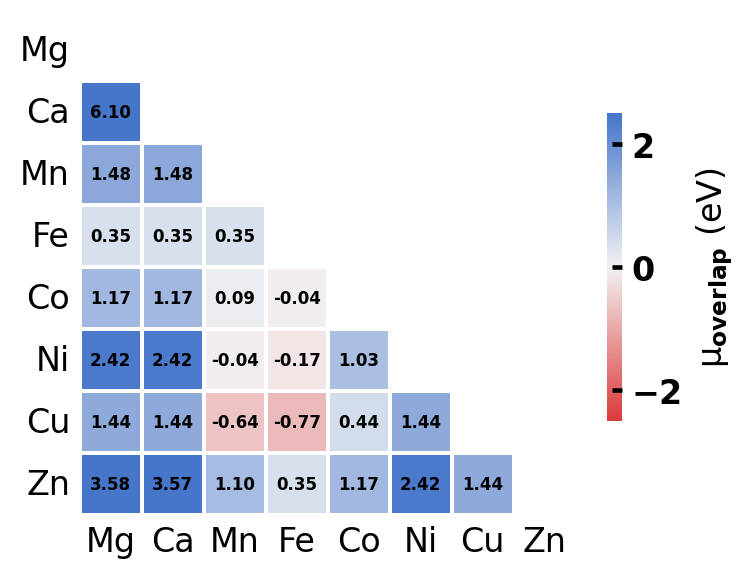

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams["figure.dpi"] = 200
plt.rcParams["figure.figsize"] = (4, 4)
plt.rcParams["font.size"] = 12
plt.rcParams["font.serif"] = "Arial"

data = pd.DataFrame(chempot_overlaps_2cation)
data = data.set_index("combo")

chempot_overlaps = np.array(
    [
        [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
        [
            data.loc["MgCa", "overlap (eV)"],
            np.nan,
            np.nan,
            np.nan,
            np.nan,
            np.nan,
            np.nan,
            np.nan,
        ],
        [
            data.loc["MgMn", "overlap (eV)"],
            data.loc["CaMn", "overlap (eV)"],
            np.nan,
            np.nan,
            np.nan,
            np.nan,
            np.nan,
            np.nan,
        ],
        [
            data.loc["MgFe", "overlap (eV)"],
            data.loc["CaFe", "overlap (eV)"],
            data.loc["MnFe", "overlap (eV)"],
            np.nan,
            np.nan,
            np.nan,
            np.nan,
            np.nan,
        ],
        [
            data.loc["MgCo", "overlap (eV)"],
            data.loc["CaCo", "overlap (eV)"],
            data.loc["MnCo", "overlap (eV)"],
            data.loc["FeCo", "overlap (eV)"],
            np.nan,
            np.nan,
            np.nan,
            np.nan,
        ],
        [
            data.loc["MgNi", "overlap (eV)"],
            data.loc["CaNi", "overlap (eV)"],
            data.loc["MnNi", "overlap (eV)"],
            data.loc["FeNi", "overlap (eV)"],
            data.loc["CoNi", "overlap (eV)"],
            np.nan,
            np.nan,
            np.nan,
        ],
        [
            data.loc["MgCu", "overlap (eV)"],
            data.loc["CaCu", "overlap (eV)"],
            data.loc["MnCu", "overlap (eV)"],
            data.loc["FeCu", "overlap (eV)"],
            data.loc["CoCu", "overlap (eV)"],
            data.loc["NiCu", "overlap (eV)"],
            np.nan,
            np.nan,
        ],
        [
            data.loc["MgZn", "overlap (eV)"],
            data.loc["CaZn", "overlap (eV)"],
            data.loc["MnZn", "overlap (eV)"],
            data.loc["FeZn", "overlap (eV)"],
            data.loc["CoZn", "overlap (eV)"],
            data.loc["NiZn", "overlap (eV)"],
            data.loc["CuZn", "overlap (eV)"],
            np.nan,
        ],
    ]
)

sns.heatmap(
    chempot_overlaps,
    square=True,
    vmin=-2.5,
    vmax=2.5,
    cmap=sns.diverging_palette(
        12,
        255,
        as_cmap=True,
    ),  # sns.color_palette("vlag_r", as_cmap=True),  # coolwarm_r
    xticklabels=("Mg", "Ca", "Mn", "Fe", "Co", "Ni", "Cu", "Zn"),
    yticklabels=("Mg", "Ca", "Mn", "Fe", "Co", "Ni", "Cu", "Zn"),
    annot=True,
    fmt=".2f",
    linewidths=0.75,
    cbar_kws={
        "label": r"μ$_{\rm overlap}$ (eV)",
        "shrink": 0.5,
        "ticks": [-2, 0.0, 2],
    },
    annot_kws={"fontsize": 6, "color": "k"},
    cbar=True,
    center=0,
)
plt.xticks(weight="normal")
plt.yticks(weight="normal")
plt.yticks(rotation=0)
plt.tick_params(left=False, bottom=False)
plt.show()

These values correspond to Figure 6b in the corresponding publication. These overlaps can be computed for an arbitrary number of cations as well, however it is useful to start with the 2-cation combinations for interpretability. Here I will show how to compute $\mu_{overlap}$ for 

In [15]:
combos_5cation = list(combinations(cation_cohort, 5))
print(f"There are {len(combos_5cation)} 5-cation combinations for our cation cohort:\n{combos_5cation}\n\n")

chempot_overlaps_5cation = {
    "combo": [],
    "overlap (eV)": [],
}

for combo in combos_5cation:

    range1 = AO_stable_ranges[f"{combo[0]}O"]
    range2 = AO_stable_ranges[f"{combo[1]}O"]
    range3 = AO_stable_ranges[f"{combo[2]}O"]
    range4 = AO_stable_ranges[f"{combo[3]}O"]
    range5 = AO_stable_ranges[f"{combo[4]}O"]

    overlap_dict = chemical_potential.calc_overlap(ranges=(range1, range2, range3, range4, range5))

    chempot_overlaps_5cation["combo"].append(f"{combo[0]}{combo[1]}{combo[2]}{combo[3]}{combo[4]}")
    chempot_overlaps_5cation["overlap (eV)"].append(overlap_dict["overlap"])

print(pd.DataFrame(chempot_overlaps_5cation))

There are 56 5-cation combinations for our cation cohort:
[('Mg', 'Ca', 'Mn', 'Fe', 'Co'), ('Mg', 'Ca', 'Mn', 'Fe', 'Ni'), ('Mg', 'Ca', 'Mn', 'Fe', 'Cu'), ('Mg', 'Ca', 'Mn', 'Fe', 'Zn'), ('Mg', 'Ca', 'Mn', 'Co', 'Ni'), ('Mg', 'Ca', 'Mn', 'Co', 'Cu'), ('Mg', 'Ca', 'Mn', 'Co', 'Zn'), ('Mg', 'Ca', 'Mn', 'Ni', 'Cu'), ('Mg', 'Ca', 'Mn', 'Ni', 'Zn'), ('Mg', 'Ca', 'Mn', 'Cu', 'Zn'), ('Mg', 'Ca', 'Fe', 'Co', 'Ni'), ('Mg', 'Ca', 'Fe', 'Co', 'Cu'), ('Mg', 'Ca', 'Fe', 'Co', 'Zn'), ('Mg', 'Ca', 'Fe', 'Ni', 'Cu'), ('Mg', 'Ca', 'Fe', 'Ni', 'Zn'), ('Mg', 'Ca', 'Fe', 'Cu', 'Zn'), ('Mg', 'Ca', 'Co', 'Ni', 'Cu'), ('Mg', 'Ca', 'Co', 'Ni', 'Zn'), ('Mg', 'Ca', 'Co', 'Cu', 'Zn'), ('Mg', 'Ca', 'Ni', 'Cu', 'Zn'), ('Mg', 'Mn', 'Fe', 'Co', 'Ni'), ('Mg', 'Mn', 'Fe', 'Co', 'Cu'), ('Mg', 'Mn', 'Fe', 'Co', 'Zn'), ('Mg', 'Mn', 'Fe', 'Ni', 'Cu'), ('Mg', 'Mn', 'Fe', 'Ni', 'Zn'), ('Mg', 'Mn', 'Fe', 'Cu', 'Zn'), ('Mg', 'Mn', 'Co', 'Ni', 'Cu'), ('Mg', 'Mn', 'Co', 'Ni', 'Zn'), ('Mg', 'Mn', 'Co', 'Cu', 'Zn'), ('Mg', 'Mn', 

As we can see from above, usually we are limited by certain cations for a given high-entropy compositions for the separation/overlap in $\mu_{overlap}$ in "steps" since usually there are certain cations that control overlap/separation...

While here I only show how to go through calculating $\mu_{overlap}$ for AO compositions, this can be done for other compositions with different cation valence states as well.

Another very useful manner to understand these oxygen chemical potential stability windows is to plot them as a heatmap on the periodic table. While we had an explicit cation cohort in our previous work, we can instead explore over the entire periodic table, using the $\mu_{overlap}$ computational descriptor with some threshold to decide what cations and compositions to explore for discovering new high-entropy oxide materials with more expensive calculations using density functional theory or machine-learning interatomic potentials.

In [16]:
from pytheos.stability import ionic_radii

print("Example is for 3+ cations (A2O3 stoichiometry)...\n")

chempot_stability_windows = {} # to be populated with {"element": }

# we can load the ionic radii yaml file to get all elements on the periodic table (that we care to explore that is)
elements_to_sample = ionic_radii.load_ionic_radii()

# those that are not in the Materials Project database & anions
elements_to_remove = [
    "Am",
    "At",
    "Bk",
    "C",
    "Cf",
    "Cm",
    "Fr",
    "N",
    "No",
    "O",
    "OH",
    "Po",
    "Ra",
    "S",
    "Xe",
    "Yb", # should work, however seems to be an issues with the Materials Project database itself... likely in the GGA/GGA+U mixing scheme
    ]

for element_to_remove in elements_to_remove:
    elements_to_sample.pop(element_to_remove)

for element in elements_to_sample:
    print(f"\n=== {element}-O ===")

    entries = materials_project.query_entries_across_chemsys(
    elements=[element, "O"], 
    api_key="YOUR_API_KEY",
    thermo_type="GGA_GGA+U",
    )
    print(f"{len(entries)} entries found across the GGA/GGA+U Materials Project database.\n")

    phasediagram = phase_diagram.generate_phase_diagram(entries=entries)

    print(phasediagram)

    chempot = chemical_potential.ChemPotDiagram(
        phase_diagram=phasediagram,
        cation=element,
        anion="O",
        target_compound=f"{element}2O3", # notice the change in stoichiometry compared to the previous example to accomodate for 3+ cation valence
    )

    chempot.get_all_stable_ranges()

    stability_window = chempot.get_target_anion_range()

    if stability_window is not None: # only add to dictionary if has some finite stability window (stable composition on the hull)
        chempot_stability_windows[element] = stability_window["distance"]

print(f"\n{len(chempot_stability_windows)} cations have some finite chemical potential stability windows for the A2O3 (A3+) stoichiometry...")

Example is for 3+ cations (A2O3 stoichiometry)...


=== Ac-O ===


Retrieving ThermoDoc documents:   0%|          | 0/28 [00:00<?, ?it/s]

28 entries found across the GGA/GGA+U Materials Project database.

Ac-O phase diagram
3 stable phases: 
Ac2O3, O2, Ac

=== Ag-O ===


Retrieving ThermoDoc documents:   0%|          | 0/45 [00:00<?, ?it/s]

45 entries found across the GGA/GGA+U Materials Project database.

Ag-O phase diagram
5 stable phases: 
O2, Ag3O4, AgO, Ag2O, Ag

=== Al-O ===


/Users/jtsivak/Code/pytheos/pytheos/stability/chemical_potential.py:89: UserWarning: WARNING!!! 
Target compound (Ag2O3) is not stable in the supplied phase diagram, therefore it will not exist on the chemical potential diagram.
  warnings.warn(


Retrieving ThermoDoc documents:   0%|          | 0/146 [00:00<?, ?it/s]

146 entries found across the GGA/GGA+U Materials Project database.

Al-O phase diagram
3 stable phases: 
Al2O3, O2, Al

=== As-O ===


Retrieving ThermoDoc documents:   0%|          | 0/44 [00:00<?, ?it/s]

44 entries found across the GGA/GGA+U Materials Project database.

As-O phase diagram
4 stable phases: 
As, O2, As2O3, As2O5

=== Au-O ===


Retrieving ThermoDoc documents:   0%|          | 0/29 [00:00<?, ?it/s]

29 entries found across the GGA/GGA+U Materials Project database.

Au-O phase diagram
3 stable phases: 
O2, Au2O3, Au

=== B-O ===


Retrieving ThermoDoc documents:   0%|          | 0/55 [00:00<?, ?it/s]

55 entries found across the GGA/GGA+U Materials Project database.

B-O phase diagram
4 stable phases: 
O2, B6O, B, B2O3

=== Ba-O ===


Retrieving ThermoDoc documents:   0%|          | 0/62 [00:00<?, ?it/s]

62 entries found across the GGA/GGA+U Materials Project database.

Ba-O phase diagram
5 stable phases: 
BaO2, BaO10, Ba, O2, BaO

=== Be-O ===


/Users/jtsivak/Code/pytheos/pytheos/stability/chemical_potential.py:89: UserWarning: WARNING!!! 
Target compound (Ba2O3) is not stable in the supplied phase diagram, therefore it will not exist on the chemical potential diagram.
  warnings.warn(


Retrieving ThermoDoc documents:   0%|          | 0/38 [00:00<?, ?it/s]

38 entries found across the GGA/GGA+U Materials Project database.

Be-O phase diagram
3 stable phases: 
O2, BeO, Be

=== Bi-O ===


/Users/jtsivak/Code/pytheos/pytheos/stability/chemical_potential.py:89: UserWarning: WARNING!!! 
Target compound (Be2O3) is not stable in the supplied phase diagram, therefore it will not exist on the chemical potential diagram.
  warnings.warn(


Retrieving ThermoDoc documents:   0%|          | 0/102 [00:00<?, ?it/s]

102 entries found across the GGA/GGA+U Materials Project database.

Bi-O phase diagram
5 stable phases: 
O2, Bi, Bi2O3, Bi4O7, BiO2

=== Br-O ===


Retrieving ThermoDoc documents:   0%|          | 0/38 [00:00<?, ?it/s]

38 entries found across the GGA/GGA+U Materials Project database.

Br-O phase diagram
3 stable phases: 
O2, Br, Br2O3

=== Ca-O ===


Retrieving ThermoDoc documents:   0%|          | 0/49 [00:00<?, ?it/s]

49 entries found across the GGA/GGA+U Materials Project database.

Ca-O phase diagram
4 stable phases: 
O2, CaO, Ca, CaO2

=== Cd-O ===


/Users/jtsivak/Code/pytheos/pytheos/stability/chemical_potential.py:89: UserWarning: WARNING!!! 
Target compound (Ca2O3) is not stable in the supplied phase diagram, therefore it will not exist on the chemical potential diagram.
  warnings.warn(


Retrieving ThermoDoc documents:   0%|          | 0/32 [00:00<?, ?it/s]

32 entries found across the GGA/GGA+U Materials Project database.

Cd-O phase diagram
3 stable phases: 
Cd, CdO, O2

=== Ce-O ===


/Users/jtsivak/Code/pytheos/pytheos/stability/chemical_potential.py:89: UserWarning: WARNING!!! 
Target compound (Cd2O3) is not stable in the supplied phase diagram, therefore it will not exist on the chemical potential diagram.
  warnings.warn(


Retrieving ThermoDoc documents:   0%|          | 0/46 [00:00<?, ?it/s]

46 entries found across the GGA/GGA+U Materials Project database.

Ce-O phase diagram
7 stable phases: 
CeO, O2, CeO2, Ce7O12, Ce2O3, Ce, Ce5O9

=== Cl-O ===


Retrieving ThermoDoc documents:   0%|          | 0/35 [00:00<?, ?it/s]

35 entries found across the GGA/GGA+U Materials Project database.

Cl-O phase diagram
5 stable phases: 
Cl2, O2, ClO3, ClO2, Cl2O7

=== Co-O ===


/Users/jtsivak/Code/pytheos/pytheos/stability/chemical_potential.py:89: UserWarning: WARNING!!! 
Target compound (Cl2O3) is not stable in the supplied phase diagram, therefore it will not exist on the chemical potential diagram.
  warnings.warn(


Retrieving ThermoDoc documents:   0%|          | 0/89 [00:00<?, ?it/s]

89 entries found across the GGA/GGA+U Materials Project database.

Co-O phase diagram
6 stable phases: 
Co3O4, O2, CoO2, CoO, Co, Co23O32

=== Cr-O ===


/Users/jtsivak/Code/pytheos/pytheos/stability/chemical_potential.py:89: UserWarning: WARNING!!! 
Target compound (Co2O3) is not stable in the supplied phase diagram, therefore it will not exist on the chemical potential diagram.
  warnings.warn(


Retrieving ThermoDoc documents:   0%|          | 0/117 [00:00<?, ?it/s]

117 entries found across the GGA/GGA+U Materials Project database.

Cr-O phase diagram
5 stable phases: 
O2, CrO2, Cr2O3, Cr5O12, Cr

=== Cs-O ===


Retrieving ThermoDoc documents:   0%|          | 0/54 [00:00<?, ?it/s]

54 entries found across the GGA/GGA+U Materials Project database.

Cs-O phase diagram
6 stable phases: 
Cs, O2, CsO2, Cs3O, Cs2O2, Cs2O

=== Cu-O ===


/Users/jtsivak/Code/pytheos/pytheos/stability/chemical_potential.py:89: UserWarning: WARNING!!! 
Target compound (Cs2O3) is not stable in the supplied phase diagram, therefore it will not exist on the chemical potential diagram.
  warnings.warn(


Retrieving ThermoDoc documents:   0%|          | 0/68 [00:00<?, ?it/s]

68 entries found across the GGA/GGA+U Materials Project database.

Cu-O phase diagram
5 stable phases: 
O2, CuO, Cu, Cu2O, Cu2O3

=== Dy-O ===


Retrieving ThermoDoc documents:   0%|          | 0/34 [00:00<?, ?it/s]

34 entries found across the GGA/GGA+U Materials Project database.

Dy-O phase diagram
3 stable phases: 
Dy, O2, Dy2O3

=== Er-O ===


Retrieving ThermoDoc documents:   0%|          | 0/34 [00:00<?, ?it/s]

34 entries found across the GGA/GGA+U Materials Project database.

Er-O phase diagram
3 stable phases: 
Er, O2, Er2O3

=== Eu-O ===


Retrieving ThermoDoc documents:   0%|          | 0/38 [00:00<?, ?it/s]

38 entries found across the GGA/GGA+U Materials Project database.

Eu-O phase diagram
5 stable phases: 
Eu2O3, Eu3O4, O2, EuO, Eu

=== F-O ===


Retrieving ThermoDoc documents:   0%|          | 0/30 [00:00<?, ?it/s]

30 entries found across the GGA/GGA+U Materials Project database.

O-F phase diagram
3 stable phases: 
OF2, O2, F2

=== Fe-O ===


/Users/jtsivak/Code/pytheos/pytheos/stability/chemical_potential.py:89: UserWarning: WARNING!!! 
Target compound (F2O3) is not stable in the supplied phase diagram, therefore it will not exist on the chemical potential diagram.
  warnings.warn(


Retrieving ThermoDoc documents:   0%|          | 0/169 [00:00<?, ?it/s]

169 entries found across the GGA/GGA+U Materials Project database.

Fe-O phase diagram
4 stable phases: 
FeO, O2, Fe, Fe2O3

=== Ga-O ===


Retrieving ThermoDoc documents:   0%|          | 0/47 [00:00<?, ?it/s]

47 entries found across the GGA/GGA+U Materials Project database.

Ga-O phase diagram
3 stable phases: 
O2, Ga, Ga2O3

=== Gd-O ===


Retrieving ThermoDoc documents:   0%|          | 0/36 [00:00<?, ?it/s]

36 entries found across the GGA/GGA+U Materials Project database.

Gd-O phase diagram
3 stable phases: 
O2, Gd, Gd2O3

=== Ge-O ===


Retrieving ThermoDoc documents:   0%|          | 0/53 [00:00<?, ?it/s]

53 entries found across the GGA/GGA+U Materials Project database.

Ge-O phase diagram
3 stable phases: 
O2, Ge, GeO2

=== H-O ===


/Users/jtsivak/Code/pytheos/pytheos/stability/chemical_potential.py:89: UserWarning: WARNING!!! 
Target compound (Ge2O3) is not stable in the supplied phase diagram, therefore it will not exist on the chemical potential diagram.
  warnings.warn(


Retrieving ThermoDoc documents:   0%|          | 0/60 [00:00<?, ?it/s]

60 entries found across the GGA/GGA+U Materials Project database.

H-O phase diagram
3 stable phases: 
O2, H2, H2O

=== Hf-O ===


/Users/jtsivak/Code/pytheos/pytheos/stability/chemical_potential.py:89: UserWarning: WARNING!!! 
Target compound (H2O3) is not stable in the supplied phase diagram, therefore it will not exist on the chemical potential diagram.
  warnings.warn(


Retrieving ThermoDoc documents:   0%|          | 0/41 [00:00<?, ?it/s]

41 entries found across the GGA/GGA+U Materials Project database.

Hf-O phase diagram
3 stable phases: 
Hf, O2, HfO2

=== Hg-O ===


/Users/jtsivak/Code/pytheos/pytheos/stability/chemical_potential.py:89: UserWarning: WARNING!!! 
Target compound (Hf2O3) is not stable in the supplied phase diagram, therefore it will not exist on the chemical potential diagram.
  warnings.warn(


Retrieving ThermoDoc documents:   0%|          | 0/54 [00:00<?, ?it/s]

54 entries found across the GGA/GGA+U Materials Project database.

Hg-O phase diagram
3 stable phases: 
Hg, HgO, O2

=== Ho-O ===


/Users/jtsivak/Code/pytheos/pytheos/stability/chemical_potential.py:89: UserWarning: WARNING!!! 
Target compound (Hg2O3) is not stable in the supplied phase diagram, therefore it will not exist on the chemical potential diagram.
  warnings.warn(


Retrieving ThermoDoc documents:   0%|          | 0/36 [00:00<?, ?it/s]

36 entries found across the GGA/GGA+U Materials Project database.

Ho-O phase diagram
3 stable phases: 
Ho, O2, Ho2O3

=== I-O ===


Retrieving ThermoDoc documents:   0%|          | 0/33 [00:00<?, ?it/s]

33 entries found across the GGA/GGA+U Materials Project database.

I-O phase diagram
3 stable phases: 
O2, I, I2O5

=== In-O ===


/Users/jtsivak/Code/pytheos/pytheos/stability/chemical_potential.py:89: UserWarning: WARNING!!! 
Target compound (I2O3) is not stable in the supplied phase diagram, therefore it will not exist on the chemical potential diagram.
  warnings.warn(


Retrieving ThermoDoc documents:   0%|          | 0/42 [00:00<?, ?it/s]

42 entries found across the GGA/GGA+U Materials Project database.

In-O phase diagram
3 stable phases: 
In, O2, In2O3

=== Ir-O ===


Retrieving ThermoDoc documents:   0%|          | 0/32 [00:00<?, ?it/s]

32 entries found across the GGA/GGA+U Materials Project database.

Ir-O phase diagram
4 stable phases: 
Ir, IrO3, O2, IrO2

=== K-O ===


/Users/jtsivak/Code/pytheos/pytheos/stability/chemical_potential.py:89: UserWarning: WARNING!!! 
Target compound (Ir2O3) is not stable in the supplied phase diagram, therefore it will not exist on the chemical potential diagram.
  warnings.warn(


Retrieving ThermoDoc documents:   0%|          | 0/65 [00:00<?, ?it/s]

65 entries found across the GGA/GGA+U Materials Project database.

K-O phase diagram
5 stable phases: 
K, O2, KO2, K2O2, K2O

=== La-O ===


/Users/jtsivak/Code/pytheos/pytheos/stability/chemical_potential.py:89: UserWarning: WARNING!!! 
Target compound (K2O3) is not stable in the supplied phase diagram, therefore it will not exist on the chemical potential diagram.
  warnings.warn(


Retrieving ThermoDoc documents:   0%|          | 0/37 [00:00<?, ?it/s]

37 entries found across the GGA/GGA+U Materials Project database.

La-O phase diagram
3 stable phases: 
O2, La2O3, La

=== Li-O ===


Retrieving ThermoDoc documents:   0%|          | 0/53 [00:00<?, ?it/s]

53 entries found across the GGA/GGA+U Materials Project database.

Li-O phase diagram
5 stable phases: 
Li, LiO8, O2, Li2O, Li2O2

=== Lu-O ===


/Users/jtsivak/Code/pytheos/pytheos/stability/chemical_potential.py:89: UserWarning: WARNING!!! 
Target compound (Li2O3) is not stable in the supplied phase diagram, therefore it will not exist on the chemical potential diagram.
  warnings.warn(


Retrieving ThermoDoc documents:   0%|          | 0/31 [00:00<?, ?it/s]

31 entries found across the GGA/GGA+U Materials Project database.

Lu-O phase diagram
3 stable phases: 
O2, Lu2O3, Lu

=== Mg-O ===


Retrieving ThermoDoc documents:   0%|          | 0/58 [00:00<?, ?it/s]

58 entries found across the GGA/GGA+U Materials Project database.

Mg-O phase diagram
3 stable phases: 
Mg, MgO, O2

=== Mn-O ===


/Users/jtsivak/Code/pytheos/pytheos/stability/chemical_potential.py:89: UserWarning: WARNING!!! 
Target compound (Mg2O3) is not stable in the supplied phase diagram, therefore it will not exist on the chemical potential diagram.
  warnings.warn(


Retrieving ThermoDoc documents:   0%|          | 0/96 [00:00<?, ?it/s]

96 entries found across the GGA/GGA+U Materials Project database.

Mn-O phase diagram
6 stable phases: 
Mn2O3, O2, Mn3O4, MnO, MnO2, Mn

=== Mo-O ===


Retrieving ThermoDoc documents:   0%|          | 0/101 [00:00<?, ?it/s]

101 entries found across the GGA/GGA+U Materials Project database.

Mo-O phase diagram
6 stable phases: 
Mo, O2, MoO3, MoO2, Mo8O23, Mo9O26

=== Na-O ===


/Users/jtsivak/Code/pytheos/pytheos/stability/chemical_potential.py:89: UserWarning: WARNING!!! 
Target compound (Mo2O3) is not stable in the supplied phase diagram, therefore it will not exist on the chemical potential diagram.
  warnings.warn(


Retrieving ThermoDoc documents:   0%|          | 0/61 [00:00<?, ?it/s]

61 entries found across the GGA/GGA+U Materials Project database.

Na-O phase diagram
5 stable phases: 
Na, O2, NaO2, Na2O2, Na2O

=== Nb-O ===


/Users/jtsivak/Code/pytheos/pytheos/stability/chemical_potential.py:89: UserWarning: WARNING!!! 
Target compound (Na2O3) is not stable in the supplied phase diagram, therefore it will not exist on the chemical potential diagram.
  warnings.warn(


Retrieving ThermoDoc documents:   0%|          | 0/60 [00:00<?, ?it/s]

60 entries found across the GGA/GGA+U Materials Project database.

Nb-O phase diagram
6 stable phases: 
O2, Nb12O29, NbO, NbO2, Nb2O5, Nb

=== Nd-O ===


/Users/jtsivak/Code/pytheos/pytheos/stability/chemical_potential.py:89: UserWarning: WARNING!!! 
Target compound (Nb2O3) is not stable in the supplied phase diagram, therefore it will not exist on the chemical potential diagram.
  warnings.warn(


Retrieving ThermoDoc documents:   0%|          | 0/46 [00:00<?, ?it/s]

46 entries found across the GGA/GGA+U Materials Project database.

Nd-O phase diagram
4 stable phases: 
Nd2O3, Nd, O2, NdO2

=== Ni-O ===


Retrieving ThermoDoc documents:   0%|          | 0/64 [00:00<?, ?it/s]

64 entries found across the GGA/GGA+U Materials Project database.

Ni-O phase diagram
4 stable phases: 
O2, NiO, Ni, Ni3O4

=== Np-O ===


/Users/jtsivak/Code/pytheos/pytheos/stability/chemical_potential.py:89: UserWarning: WARNING!!! 
Target compound (Ni2O3) is not stable in the supplied phase diagram, therefore it will not exist on the chemical potential diagram.
  warnings.warn(


Retrieving ThermoDoc documents:   0%|          | 0/29 [00:00<?, ?it/s]

29 entries found across the GGA/GGA+U Materials Project database.

Np-O phase diagram
4 stable phases: 
Np, O2, NpO2, Np2O5


/Users/jtsivak/Code/pytheos/pytheos/stability/chemical_potential.py:89: UserWarning: WARNING!!! 
Target compound (Np2O3) is not stable in the supplied phase diagram, therefore it will not exist on the chemical potential diagram.
  warnings.warn(



=== Os-O ===


Retrieving ThermoDoc documents:   0%|          | 0/33 [00:00<?, ?it/s]

33 entries found across the GGA/GGA+U Materials Project database.

Os-O phase diagram
4 stable phases: 
O2, Os, OsO4, OsO2

=== P-O ===


/Users/jtsivak/Code/pytheos/pytheos/stability/chemical_potential.py:89: UserWarning: WARNING!!! 
Target compound (Os2O3) is not stable in the supplied phase diagram, therefore it will not exist on the chemical potential diagram.
  warnings.warn(


Retrieving ThermoDoc documents:   0%|          | 0/58 [00:00<?, ?it/s]

58 entries found across the GGA/GGA+U Materials Project database.

P-O phase diagram
3 stable phases: 
P, O2, P2O5

=== Pa-O ===


/Users/jtsivak/Code/pytheos/pytheos/stability/chemical_potential.py:89: UserWarning: WARNING!!! 
Target compound (P2O3) is not stable in the supplied phase diagram, therefore it will not exist on the chemical potential diagram.
  warnings.warn(


Retrieving ThermoDoc documents:   0%|          | 0/30 [00:00<?, ?it/s]

30 entries found across the GGA/GGA+U Materials Project database.

Pa-O phase diagram
4 stable phases: 
Pa, O2, PaO2, PaO3


/Users/jtsivak/Code/pytheos/pytheos/stability/chemical_potential.py:89: UserWarning: WARNING!!! 
Target compound (Pa2O3) is not stable in the supplied phase diagram, therefore it will not exist on the chemical potential diagram.
  warnings.warn(



=== Pb-O ===


Retrieving ThermoDoc documents:   0%|          | 0/55 [00:00<?, ?it/s]

55 entries found across the GGA/GGA+U Materials Project database.

Pb-O phase diagram
5 stable phases: 
O2, Pb, PbO2, Pb3O4, PbO

=== Pd-O ===


/Users/jtsivak/Code/pytheos/pytheos/stability/chemical_potential.py:89: UserWarning: WARNING!!! 
Target compound (Pb2O3) is not stable in the supplied phase diagram, therefore it will not exist on the chemical potential diagram.
  warnings.warn(


Retrieving ThermoDoc documents:   0%|          | 0/34 [00:00<?, ?it/s]

34 entries found across the GGA/GGA+U Materials Project database.

Pd-O phase diagram
4 stable phases: 
PdO2, O2, PdO, Pd

=== Pm-O ===


/Users/jtsivak/Code/pytheos/pytheos/stability/chemical_potential.py:89: UserWarning: WARNING!!! 
Target compound (Pd2O3) is not stable in the supplied phase diagram, therefore it will not exist on the chemical potential diagram.
  warnings.warn(


Retrieving ThermoDoc documents:   0%|          | 0/28 [00:00<?, ?it/s]

28 entries found across the GGA/GGA+U Materials Project database.

Pm-O phase diagram
3 stable phases: 
O2, Pm2O3, Pm

=== Pr-O ===


Retrieving ThermoDoc documents:   0%|          | 0/47 [00:00<?, ?it/s]

47 entries found across the GGA/GGA+U Materials Project database.

Pr-O phase diagram
3 stable phases: 
O2, Pr2O3, Pr

=== Pt-O ===


Retrieving ThermoDoc documents:   0%|          | 0/40 [00:00<?, ?it/s]

40 entries found across the GGA/GGA+U Materials Project database.

Pt-O phase diagram
4 stable phases: 
Pt, PtO2, O2, Pt3O4

=== Pu-O ===


/Users/jtsivak/Code/pytheos/pytheos/stability/chemical_potential.py:89: UserWarning: WARNING!!! 
Target compound (Pt2O3) is not stable in the supplied phase diagram, therefore it will not exist on the chemical potential diagram.
  warnings.warn(


Retrieving ThermoDoc documents:   0%|          | 0/39 [00:00<?, ?it/s]

39 entries found across the GGA/GGA+U Materials Project database.

Pu-O phase diagram
4 stable phases: 
O2, PuO2, Pu, Pu2O3

=== Rb-O ===


Retrieving ThermoDoc documents:   0%|          | 0/63 [00:00<?, ?it/s]

63 entries found across the GGA/GGA+U Materials Project database.

Rb-O phase diagram
6 stable phases: 
Rb, RbO2, O2, Rb9O2, Rb2O, Rb2O2

=== Re-O ===


/Users/jtsivak/Code/pytheos/pytheos/stability/chemical_potential.py:89: UserWarning: WARNING!!! 
Target compound (Rb2O3) is not stable in the supplied phase diagram, therefore it will not exist on the chemical potential diagram.
  warnings.warn(


Retrieving ThermoDoc documents:   0%|          | 0/44 [00:00<?, ?it/s]

44 entries found across the GGA/GGA+U Materials Project database.

Re-O phase diagram
4 stable phases: 
Re2O7, O2, ReO3, Re

=== Rh-O ===


/Users/jtsivak/Code/pytheos/pytheos/stability/chemical_potential.py:89: UserWarning: WARNING!!! 
Target compound (Re2O3) is not stable in the supplied phase diagram, therefore it will not exist on the chemical potential diagram.
  warnings.warn(


Retrieving ThermoDoc documents:   0%|          | 0/35 [00:00<?, ?it/s]

35 entries found across the GGA/GGA+U Materials Project database.

Rh-O phase diagram
3 stable phases: 
O2, RhO2, Rh

=== Ru-O ===


/Users/jtsivak/Code/pytheos/pytheos/stability/chemical_potential.py:89: UserWarning: WARNING!!! 
Target compound (Rh2O3) is not stable in the supplied phase diagram, therefore it will not exist on the chemical potential diagram.
  warnings.warn(


Retrieving ThermoDoc documents:   0%|          | 0/29 [00:00<?, ?it/s]

29 entries found across the GGA/GGA+U Materials Project database.

Ru-O phase diagram
4 stable phases: 
O2, Ru, RuO4, RuO2

=== Sb-O ===


/Users/jtsivak/Code/pytheos/pytheos/stability/chemical_potential.py:89: UserWarning: WARNING!!! 
Target compound (Ru2O3) is not stable in the supplied phase diagram, therefore it will not exist on the chemical potential diagram.
  warnings.warn(


Retrieving ThermoDoc documents:   0%|          | 0/84 [00:00<?, ?it/s]

84 entries found across the GGA/GGA+U Materials Project database.

Sb-O phase diagram
5 stable phases: 
Sb, O2, Sb2O5, Sb2O3, SbO2

=== Sc-O ===


Retrieving ThermoDoc documents:   0%|          | 0/45 [00:00<?, ?it/s]

45 entries found across the GGA/GGA+U Materials Project database.

Sc-O phase diagram
3 stable phases: 
O2, Sc2O3, Sc

=== Se-O ===


Retrieving ThermoDoc documents:   0%|          | 0/41 [00:00<?, ?it/s]

41 entries found across the GGA/GGA+U Materials Project database.

Se-O phase diagram
4 stable phases: 
O2, Se2O5, Se, SeO2

=== Si-O ===


/Users/jtsivak/Code/pytheos/pytheos/stability/chemical_potential.py:89: UserWarning: WARNING!!! 
Target compound (Se2O3) is not stable in the supplied phase diagram, therefore it will not exist on the chemical potential diagram.
  warnings.warn(


Retrieving ThermoDoc documents:   0%|          | 0/407 [00:00<?, ?it/s]

407 entries found across the GGA/GGA+U Materials Project database.

Si-O phase diagram
3 stable phases: 
O2, Si, SiO2

=== Sm-O ===


/Users/jtsivak/Code/pytheos/pytheos/stability/chemical_potential.py:89: UserWarning: WARNING!!! 
Target compound (Si2O3) is not stable in the supplied phase diagram, therefore it will not exist on the chemical potential diagram.
  warnings.warn(


Retrieving ThermoDoc documents:   0%|          | 0/37 [00:00<?, ?it/s]

37 entries found across the GGA/GGA+U Materials Project database.

Sm-O phase diagram
3 stable phases: 
O2, Sm2O3, Sm

=== Sn-O ===


Retrieving ThermoDoc documents:   0%|          | 0/78 [00:00<?, ?it/s]

78 entries found across the GGA/GGA+U Materials Project database.

Sn-O phase diagram
5 stable phases: 
Sn, O2, SnO, SnO2, Sn5O6

=== Sr-O ===


/Users/jtsivak/Code/pytheos/pytheos/stability/chemical_potential.py:89: UserWarning: WARNING!!! 
Target compound (Sn2O3) is not stable in the supplied phase diagram, therefore it will not exist on the chemical potential diagram.
  warnings.warn(


Retrieving ThermoDoc documents:   0%|          | 0/50 [00:00<?, ?it/s]

50 entries found across the GGA/GGA+U Materials Project database.

Sr-O phase diagram
4 stable phases: 
Sr, O2, SrO, SrO2


/Users/jtsivak/Code/pytheos/pytheos/stability/chemical_potential.py:89: UserWarning: WARNING!!! 
Target compound (Sr2O3) is not stable in the supplied phase diagram, therefore it will not exist on the chemical potential diagram.
  warnings.warn(



=== Ta-O ===


Retrieving ThermoDoc documents:   0%|          | 0/73 [00:00<?, ?it/s]

73 entries found across the GGA/GGA+U Materials Project database.

Ta-O phase diagram
3 stable phases: 
O2, Ta2O5, Ta

=== Tb-O ===


/Users/jtsivak/Code/pytheos/pytheos/stability/chemical_potential.py:89: UserWarning: WARNING!!! 
Target compound (Ta2O3) is not stable in the supplied phase diagram, therefore it will not exist on the chemical potential diagram.
  warnings.warn(


Retrieving ThermoDoc documents:   0%|          | 0/40 [00:00<?, ?it/s]

40 entries found across the GGA/GGA+U Materials Project database.

Tb-O phase diagram
3 stable phases: 
Tb2O3, Tb, O2

=== Tc-O ===


Retrieving ThermoDoc documents:   0%|          | 0/28 [00:00<?, ?it/s]

28 entries found across the GGA/GGA+U Materials Project database.

Tc-O phase diagram
4 stable phases: 
Tc, O2, Tc2O7, TcO2

=== Te-O ===


/Users/jtsivak/Code/pytheos/pytheos/stability/chemical_potential.py:89: UserWarning: WARNING!!! 
Target compound (Tc2O3) is not stable in the supplied phase diagram, therefore it will not exist on the chemical potential diagram.
  warnings.warn(


Retrieving ThermoDoc documents:   0%|          | 0/56 [00:00<?, ?it/s]

56 entries found across the GGA/GGA+U Materials Project database.

Te-O phase diagram
5 stable phases: 
TeO3, Te2O5, O2, Te, TeO2

=== Th-O ===


/Users/jtsivak/Code/pytheos/pytheos/stability/chemical_potential.py:89: UserWarning: WARNING!!! 
Target compound (Te2O3) is not stable in the supplied phase diagram, therefore it will not exist on the chemical potential diagram.
  warnings.warn(


Retrieving ThermoDoc documents:   0%|          | 0/29 [00:00<?, ?it/s]

29 entries found across the GGA/GGA+U Materials Project database.

Th-O phase diagram
3 stable phases: 
O2, Th, ThO2

=== Ti-O ===


/Users/jtsivak/Code/pytheos/pytheos/stability/chemical_potential.py:89: UserWarning: WARNING!!! 
Target compound (Th2O3) is not stable in the supplied phase diagram, therefore it will not exist on the chemical potential diagram.
  warnings.warn(


Retrieving ThermoDoc documents:   0%|          | 0/153 [00:00<?, ?it/s]

153 entries found across the GGA/GGA+U Materials Project database.

Ti-O phase diagram
9 stable phases: 
TiO, Ti3O5, Ti2O, O2, Ti3O, Ti2O3, Ti6O, TiO2, Ti

=== Tl-O ===


Retrieving ThermoDoc documents:   0%|          | 0/37 [00:00<?, ?it/s]

37 entries found across the GGA/GGA+U Materials Project database.

Tl-O phase diagram
5 stable phases: 
O2, Tl2O3, Tl2O, Tl4O3, Tl

=== Tm-O ===


Retrieving ThermoDoc documents:   0%|          | 0/33 [00:00<?, ?it/s]

33 entries found across the GGA/GGA+U Materials Project database.

Tm-O phase diagram
3 stable phases: 
Tm, O2, Tm2O3

=== U-O ===


Retrieving ThermoDoc documents:   0%|          | 0/76 [00:00<?, ?it/s]

76 entries found across the GGA/GGA+U Materials Project database.

U-O phase diagram
6 stable phases: 
O2, UO2, U3O8, UO3, U, U17O31

=== V-O ===


/Users/jtsivak/Code/pytheos/pytheos/stability/chemical_potential.py:89: UserWarning: WARNING!!! 
Target compound (U2O3) is not stable in the supplied phase diagram, therefore it will not exist on the chemical potential diagram.
  warnings.warn(


Retrieving ThermoDoc documents:   0%|          | 0/230 [00:00<?, ?it/s]

230 entries found across the GGA/GGA+U Materials Project database.

V-O phase diagram
6 stable phases: 
V3O5, O2, V, VO2, V2O3, V2O5

=== W-O ===


Retrieving ThermoDoc documents:   0%|          | 0/125 [00:00<?, ?it/s]

125 entries found across the GGA/GGA+U Materials Project database.

W-O phase diagram
4 stable phases: 
O2, WO2, WO3, W

=== Y-O ===


/Users/jtsivak/Code/pytheos/pytheos/stability/chemical_potential.py:89: UserWarning: WARNING!!! 
Target compound (W2O3) is not stable in the supplied phase diagram, therefore it will not exist on the chemical potential diagram.
  warnings.warn(


Retrieving ThermoDoc documents:   0%|          | 0/47 [00:00<?, ?it/s]

47 entries found across the GGA/GGA+U Materials Project database.

Y-O phase diagram
3 stable phases: 
Y, O2, Y2O3

=== Zn-O ===


Retrieving ThermoDoc documents:   0%|          | 0/48 [00:00<?, ?it/s]

48 entries found across the GGA/GGA+U Materials Project database.

Zn-O phase diagram
3 stable phases: 
O2, ZnO, Zn

=== Zr-O ===


/Users/jtsivak/Code/pytheos/pytheos/stability/chemical_potential.py:89: UserWarning: WARNING!!! 
Target compound (Zn2O3) is not stable in the supplied phase diagram, therefore it will not exist on the chemical potential diagram.
  warnings.warn(


Retrieving ThermoDoc documents:   0%|          | 0/59 [00:00<?, ?it/s]

59 entries found across the GGA/GGA+U Materials Project database.

Zr-O phase diagram
5 stable phases: 
Zr4O, O2, Zr, ZrO2, Zr3O

34 cations have some finite chemical potential stability windows for the A2O3 (A3+) stoichiometry...


/Users/jtsivak/Code/pytheos/pytheos/stability/chemical_potential.py:89: UserWarning: WARNING!!! 
Target compound (Zr2O3) is not stable in the supplied phase diagram, therefore it will not exist on the chemical potential diagram.
  warnings.warn(


<Axes: >

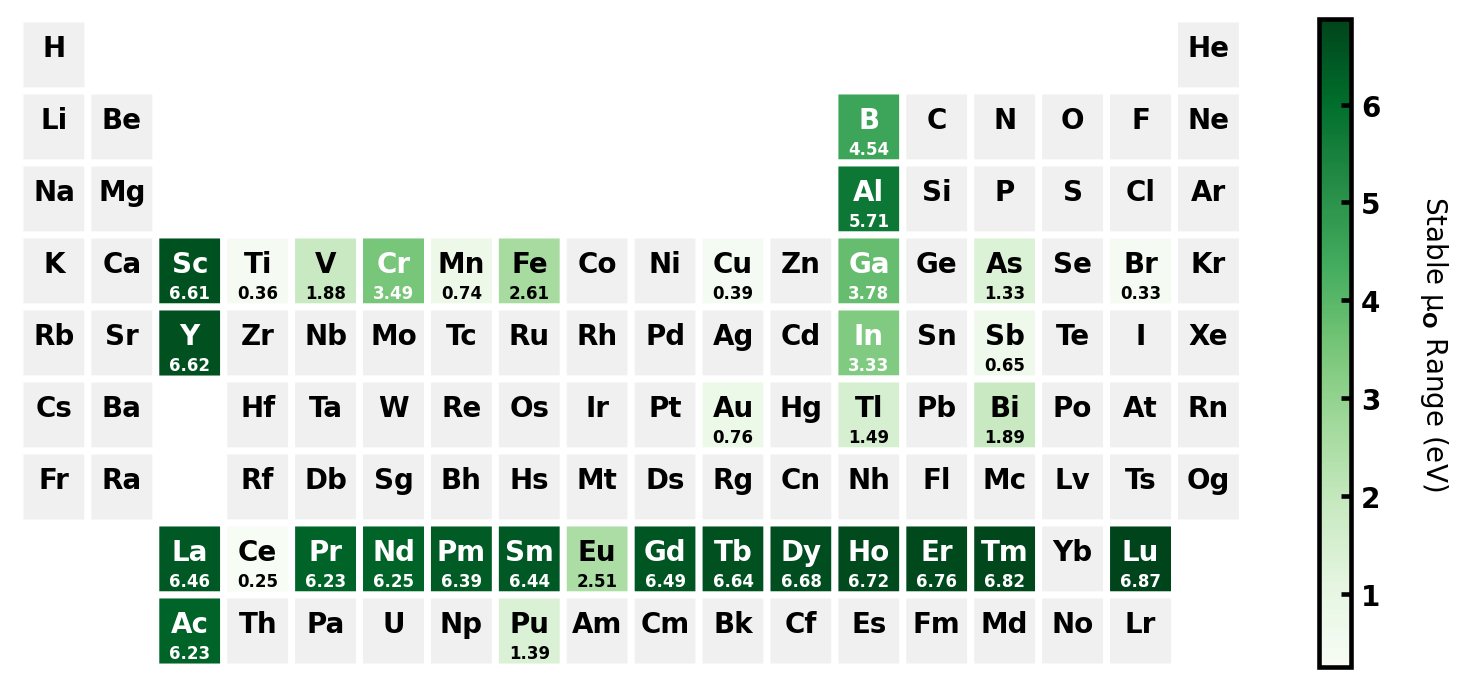

In [17]:
from pytheos.plotting import plot_heatmap_periodic_table

plot_heatmap_periodic_table(
    elemental_data=chempot_stability_windows, 
    cbar_label=r"Stable μ$_{\rm O}$ Range (eV)",
    cmap="Greens",
    blank_color="#F0F0F0",
    value_format="%.2f",
    )

We can see that these values follow our expectations using chemical intuition built in the periodic table...
- Column 3 and 13 elements prefer 3+ valence since they have full valence shalls
- many of the Lanthanide elements prefer 3+ valence
- narrower windows for the early 3d-transition metals, with the widest being Cr3+ as expected as it primarily takes this oxidation state...